In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 加载数据集
file_path = 'bike.csv'  
data = pd.read_csv(file_path)

# 2. 删除'id'列
data.drop(columns=['id'], inplace=True)

# 3. 筛选上海市数据并删除'city'列
data = data[data['city'] == 1]
data.drop(columns=['city'], inplace=True)

# 4. 时间特征标准化
data['hour'] = data['hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

# 5. 设置预测目标'y'并删除目标列
y = data.pop('y')
X = data

# 6. 转换为Numpy数组
X = X.to_numpy()
y = y.to_numpy()

# 7. 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 9. 模型预测
y_pred = model.predict(X_test)

# 10. 计算并输出RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 33.183905431705334


C:\Users\57572\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\57572\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\57572\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\57572\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\57572\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

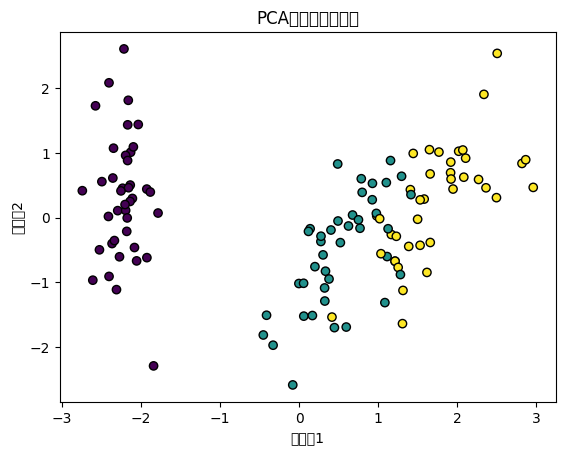

分类准确率: 0.9333333333333333


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. PCA降维
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 可视化降维结果
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('PCA降维后的散点图')
plt.show()

# 4. 使用K近邻分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# 5. 模型评估
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"分类准确率: {accuracy}")
